In [21]:
from matplotlib import pyplot as plt
import thunder

%matplotlib inline

In [9]:
plt.style.use(['seaborn-talk', 'seaborn-deep', 'seaborn-white'])

In [3]:
from pyspark import SparkContext
sc = SparkContext(master='local')

In [18]:
images = thunder.images.fromexample('fish')
images

Images
mode: local
dtype: uint8
shape: (20, 76, 87, 2)

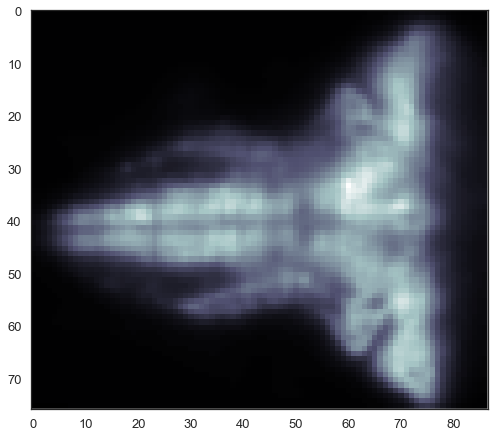

In [19]:
plt.imshow(images[0,:,:,0].toarray(), cmap='bone', interpolation='none');

In [20]:
series = images.totimeseries()
series

TimeSeries
mode: local
dtype: uint8
shape: (76, 87, 2, 20)

In [32]:
import numpy as np
filtered = series.filter(lambda x: np.std(x)>5)
filtered

TimeSeries
mode: local
dtype: uint8
shape: (508, 20)

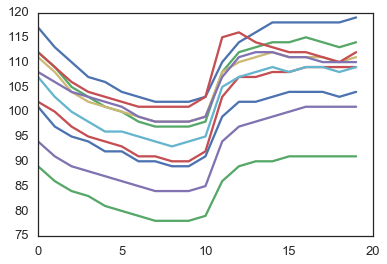

In [35]:
plt.plot(filtered[:10].toarray().T);

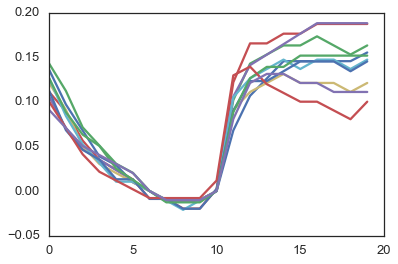

In [37]:
plt.plot(filtered.normalize()[:10].toarray().T);

In [58]:
arr = series.normalize().toarray()
arr.shape

(76, 87, 2, 20)

In [59]:
arr = arr.reshape(76*87*2, 20).astype('float')
arr.shape

(13224, 20)

In [60]:
from sklearn.cluster import KMeans

In [62]:
model = KMeans(n_clusters=8).fit(arr)
ids = model.fit_predict(arr)

In [64]:
ids = ids.reshape(76, 87, 2)

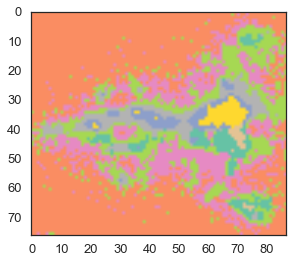

In [68]:
plt.imshow(ids[:,:,0], cmap='Set2');

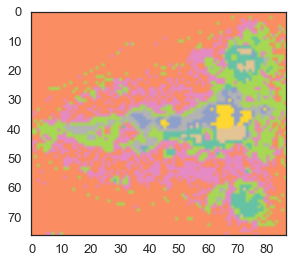

In [71]:
plt.imshow(ids[:,:,1], cmap='Set2')